<a href="https://colab.research.google.com/github/Denisganga/the_plant_doctor/blob/main/The_plant_doctor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:

#importing the required modules
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
import torchvision.transforms as transforms

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
from torchvision import datasets
from torch.utils.data import random_split
import numpy as np
import random

In [73]:
#unzipping my dataset
import zipfile

zip_file_path =  "/content/drive/My Drive/the_plant_doctor/archive.zip"
extract_path = "/content/dataset"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

In [74]:
# Define the data directory (the path where your unzipped dataset is located)
data_dir="/content/dataset"

In [75]:
#setup device agnostic code(using the GPU if available)
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [76]:
#define the transformations
data_transforms =transforms.Compose([
    #make the model more robust to differently oriented images.
    transforms.RandomRotation(degrees=15),

    #random cropping of images to create multiple views of the same image
    transforms.RandomCrop(size=(224,224), padding=10),

    #Apply random color transformations to the images to make the model more invariant to changes in lighting and color
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2,hue=0.2),

    #help the model focus on important features and reduce noise
    transforms.GaussianBlur(kernel_size=3),

    #resize and crop the image to create variations in the field of view.
    transforms.RandomResizedCrop(size=(224,224), scale=(0.8, 1.0)),

    #introduce controlled occlusions or "erasing" of parts of the image during training
    transforms.RandomErasing(),

    #Randomly flip the image horizontally
    transforms.RandomHorizontalFlip(),

    #Convert the image to a PyTorch tensor
    transforms.ToTensor(),

     # Normalize the image based on typical RGB mean and standard deviation
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])



])

In [77]:
#create a dataset using ImageFolder
dataset= datasets.ImageFolder(data_dir, transform=data_transforms)

In [78]:
# Define class labels based on the dataset structure
classes = dataset.classes

In [79]:
#splitting the dataset into training and testing sets
train_size = int(0.8*len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset,[train_size, test_size])

In [80]:
print(len(dataset))
print(len(train_dataset))
print(len(test_dataset))

41276
33020
8256


In [81]:
#see the first training sample
image, label = train_dataset[0]
image, label

(tensor([[[-1.8782, -1.8782, -1.8782,  ...,  0.3309,  0.3823,  0.3823],
          [-1.8782, -1.8782, -1.8782,  ...,  0.4166,  0.4166,  0.3994],
          [-1.8782, -1.8782, -1.8782,  ...,  0.4508,  0.4337,  0.3994],
          ...,
          [-1.8782, -1.8782, -1.8782,  ...,  0.1083,  0.0398, -0.0116],
          [-1.8782, -1.8782, -1.8782,  ...,  0.0912,  0.0569,  0.0227],
          [-1.8782, -1.8782, -1.8782,  ...,  0.0741,  0.0912,  0.0569]],
 
         [[-1.7906, -1.7906, -1.7906,  ...,  0.0301,  0.0826,  0.1001],
          [-1.7906, -1.7906, -1.7906,  ...,  0.1176,  0.1352,  0.1176],
          [-1.7906, -1.7906, -1.7906,  ...,  0.1527,  0.1527,  0.1176],
          ...,
          [-1.7906, -1.7906, -1.7906,  ..., -0.1800, -0.2500, -0.2850],
          [-1.7906, -1.7906, -1.7906,  ..., -0.1800, -0.2150, -0.2675],
          [-1.7906, -1.7906, -1.7906,  ..., -0.1800, -0.1800, -0.2150]],
 
         [[-1.5604, -1.5604, -1.5604,  ...,  0.7054,  0.7576,  0.7576],
          [-1.5604, -1.5604,

In [82]:
image.shape

torch.Size([3, 224, 224])

In [83]:
# See classes
class_names = dataset.classes

class_names

['PlantVillage', 'plantvillage']

In [84]:

#contents of plantvillages and PlantVillages directories
import os

# Define the paths to the "PlantVillage" and "plantvillage" directories
plant_village_path = os.path.join(data_dir, "PlantVillage")
plant_village_lower_path = os.path.join(data_dir, "plantvillage")

# List the subdirectories within "PlantVillage"
plant_village_classes = os.listdir(plant_village_path)

# List the subdirectories within "plantvillage"
plant_village_lower_classes = os.listdir(plant_village_lower_path)

print("Classes in 'PlantVillage':", plant_village_classes)
print("Classes in 'plantvillage':", plant_village_lower_classes)

Classes in 'PlantVillage': ['Tomato_healthy', 'Potato___Late_blight', 'Tomato_Late_blight', 'Tomato_Early_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Pepper__bell___healthy', 'Pepper__bell___Bacterial_spot', 'Potato___Early_blight', 'Tomato_Bacterial_spot', 'Tomato_Leaf_Mold', 'Potato___healthy', 'Tomato_Septoria_leaf_spot', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']
Classes in 'plantvillage': ['PlantVillage']


In [85]:
# Define the path to the "PlantVillage" directory
plant_village_dir = os.path.join(data_dir, "PlantVillage")

# List the subdirectories (class labels) within "PlantVillage"
plant_village_subclasses = os.listdir(plant_village_dir)

# Print the class labels within "PlantVillage"
print("Subclasses in 'PlantVillage':", plant_village_subclasses)

Subclasses in 'PlantVillage': ['Tomato_healthy', 'Potato___Late_blight', 'Tomato_Late_blight', 'Tomato_Early_blight', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Pepper__bell___healthy', 'Pepper__bell___Bacterial_spot', 'Potato___Early_blight', 'Tomato_Bacterial_spot', 'Tomato_Leaf_Mold', 'Potato___healthy', 'Tomato_Septoria_leaf_spot', 'Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_YellowLeaf__Curl_Virus']


In [86]:
len(plant_village_classes)

15

In [87]:
#create a Dataloader for efficient dataloading and batch, turning datasets into batches
batch_size = 7
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#lets checkout what we have created
print(f"the data loaders are:{test_data_loader,train_data_loader}")
print(f"the length of train dataloader:{len(train_data_loader)} batches of {batch_size}")
print(f"the length of test dataloader:{len(test_data_loader)} batches of {batch_size}")

the data loaders are:(<torch.utils.data.dataloader.DataLoader object at 0x7c8864061db0>, <torch.utils.data.dataloader.DataLoader object at 0x7c88640638e0>)
the length of train dataloader:4718 batches of 7
the length of test dataloader:1180 batches of 7


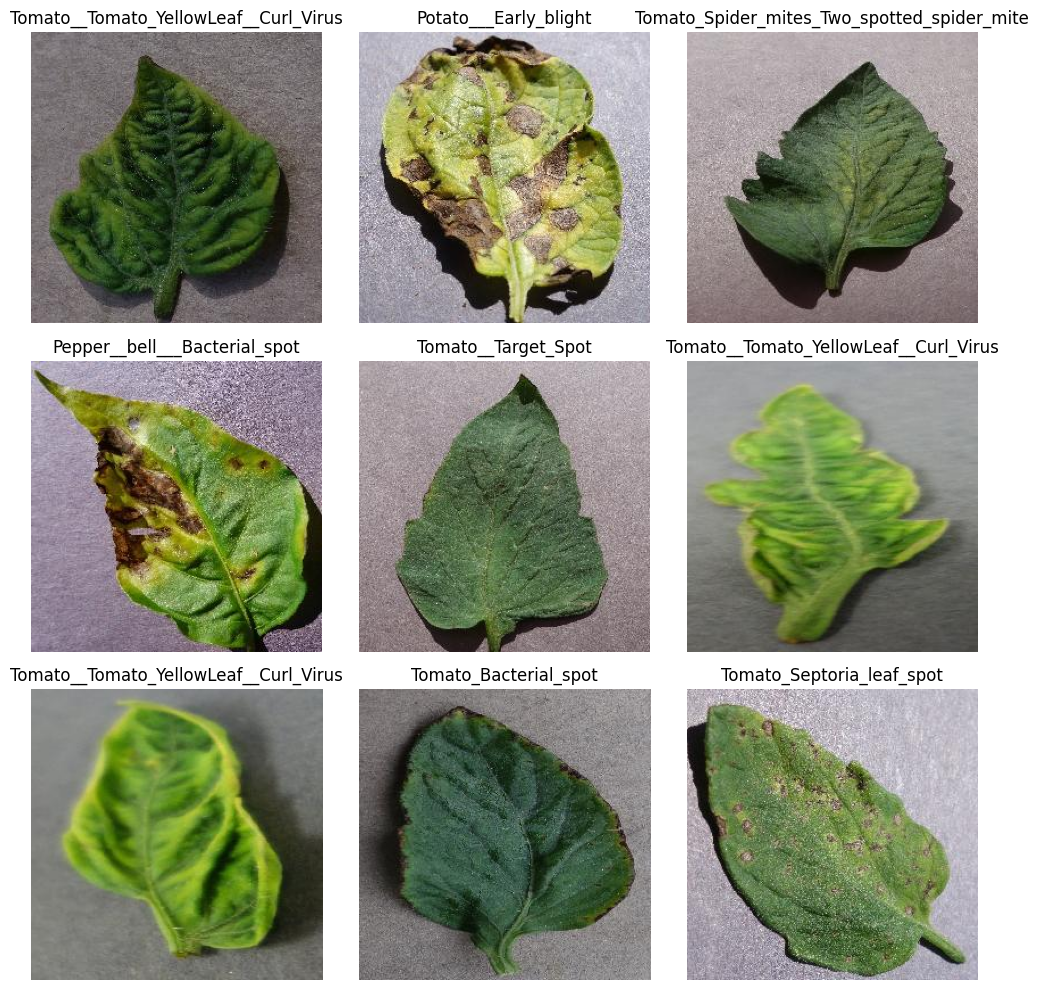

In [88]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the "PlantVillage" directory
plant_village_path = os.path.join(data_dir, "PlantVillage")

# List the subdirectories (class labels) within "PlantVillage"
class_labels = os.listdir(plant_village_path)

# Create a 3x3 grid to display random images
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i in range(num_rows * num_cols):
    # Randomly select a class label
    random_label = random.choice(class_labels)

    # Find a random image within the class directory
    class_dir = os.path.join(plant_village_path, random_label)
    image_files = os.listdir(class_dir)
    random_image_file = os.path.join(class_dir, random.choice(image_files))
    random_image = Image.open(random_image_file)

    # Plot the image
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(random_image)
    axes[row, col].set_title(random_label)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()


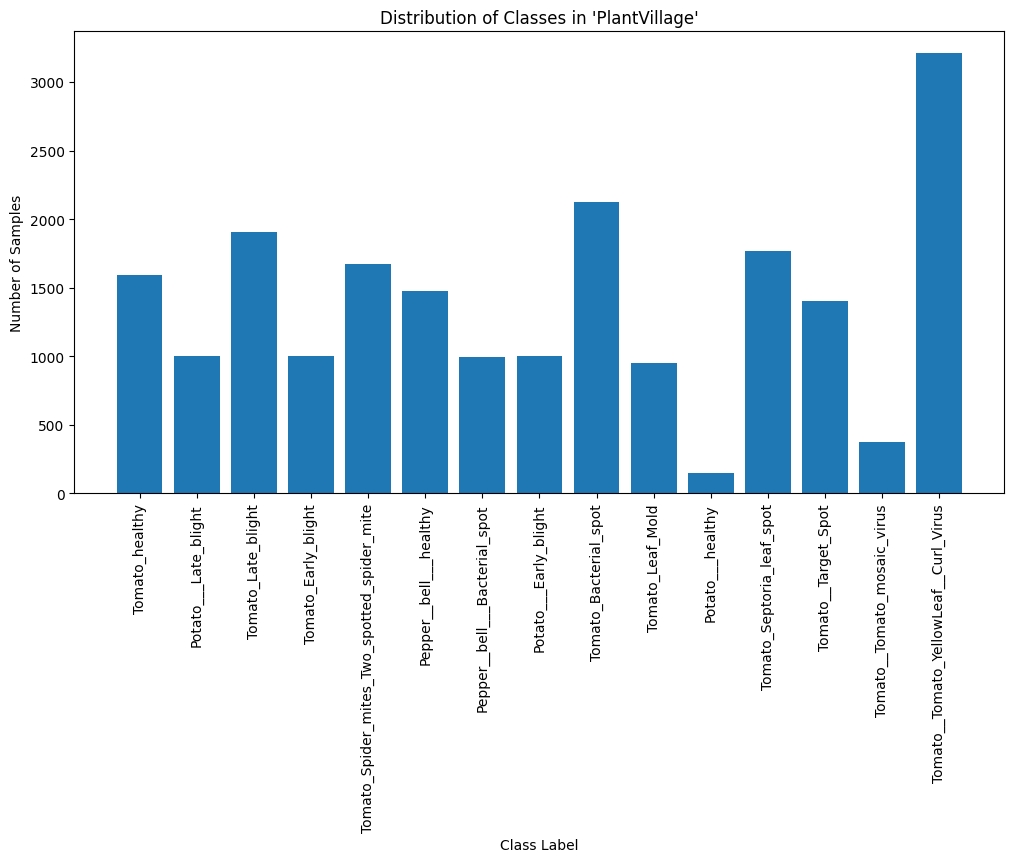

In [89]:

# Count the number of samples in each class
class_counts = [ len(os.listdir(os.path.join(plant_village_path, class_label))) for class_label in class_labels]

# Create a bar chart (histogram) to visualize the class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_labels, class_counts)
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.title("Distribution of Classes in 'PlantVillage'")
plt.xticks(rotation=90)
plt.show()


In [90]:
!pip install Pillow


In [98]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_data_loader))
train_features_batch.shape, train_labels_batch.shape


AttributeError: ignored